# Przetwarzanie Grafiki i Muzyki - laboratorium nr 7

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Binaryzacja.

Binaryzacja polega na zamianie obrazów monochromatycznych na obrazy binarne. Przekształcenie to jest prawie zawsze wykorzystywane w analizie obrazów, gdyż wiele operacji może być przeprowadzonych wyłącznie na obiektach binarnych.

## Zadanie 1 (1 punkt)

Proszę zaimplementować binaryzację z zadanym poziomem ( a ).

$$
J(i,j) = \left\{ \begin{array}{ll}
0 & \textrm{gdy } J(i,j)<a \\
255 & \textrm{gdy } J(i,j) \geq a 
\end{array} \right.
$$

  * Proszę zastosować do zdjęcia "LENA_512.jpg". 
  * Proszę wykonać na Luminancji (składowa Y z formatu YCbCr). 

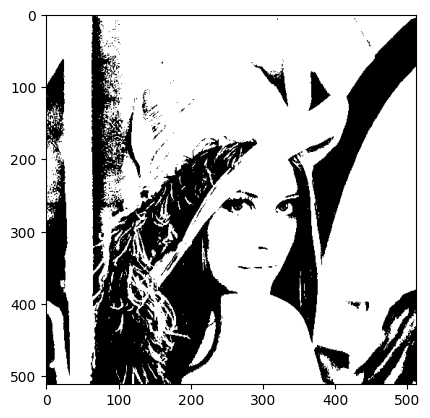

In [30]:
lena = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)

def binarize(img, a):
    res = img.copy()
    binarized = (img[:,:,0] >= a).astype(np.uint8) * 255
    res[:,:,0] = binarized[:,:]
    return res[:,:,0]

    
lena_bin = binarize(lena, 100)
plt.imshow(lena_bin, cmap='grey')

## Zadanie 2 (1 punkt) 

Proszę zaimplementować binaryzację z zadanym przedziałem ($[a,b]$):

$$
J(i,j) = \left\{ \begin{array}{ll}
255 & \textrm{gdy } J(i,j) \in \left[a,b\right] \\
0 & \textrm{w przeciwnym przypadku} 
\end{array} \right.
$$

Zastosuj tę binaryzację do obrazu "LENA_512.jpg".

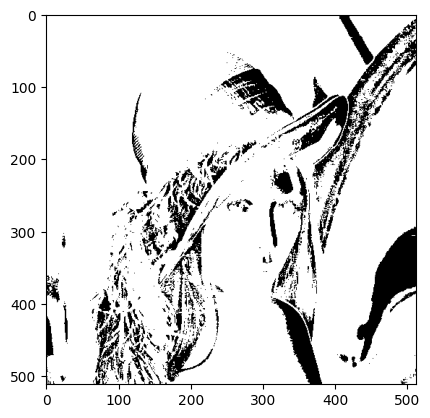

In [38]:
lena = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2YCrCb)

def binarize_range(img, a, b):
    res = img.copy()
    binarized = ((img[:,:,0] >= a) & (img[:,:,0] <= b)).astype(np.uint8) * 255
    res[:,:,0] = binarized[:,:]
    return res[:,:,0]

    
lena_bin = binarize_range(lena, 50, 200)
plt.imshow(lena_bin, cmap='grey')

# Zadanie 3 (2 punkty)

Prosze użyć algorytm binaryzacji Otsu do zdjęcia "gazeta.jpg". 

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/gazeta.jpg)

Proszę wykonać na Luminancji (składowa Y z formatu YCbCr).

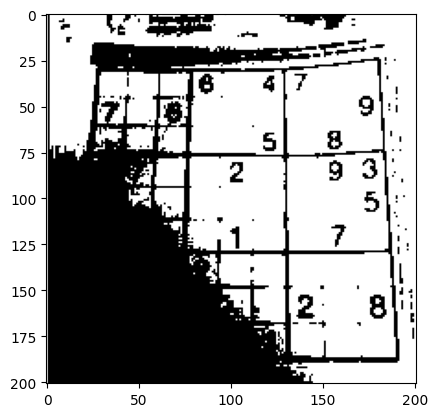

In [50]:
paper = cv2.cvtColor(cv2.imread('./img/gazeta.jpg'), cv2.COLOR_BGR2YCrCb)
paper_l = paper[:,:,0]

x, t = cv2.threshold(paper_l, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(t, cmap='grey')

# Zadanie 4 (3 punkty)

Proszę zaimplementować algorytm binaryzacji Bernsena. Metoda Bernsena to algorytm wyznaczania progu lokalnego w oparciu o otoczenie piksela (zwykle kwadratowe okno o nieparzystej szerokości). 
Próg ustawiany jest na wartość średnią najjaśniejszego i najciemniejszego piksela.

  * Proszę użyć algorytm binaryzacji Bernsena do zdjęcia "gazeta.jpg".
  * Proszę wykonać na Luminancji (składowa Y z formatu YCbCr).

Algorytm Brensena:
1. Przekształcamy oryginalny obrazek do skali szarości. Możemy teraz myśleć o obrazku, jak o pewnej funkcji $I\left(x,y\right): \mathbf{N}^2 \rightarrow \mathbf{N}$ (zakładając, że poruszamy się po świecie liczb naturalnych).
2. Wokół każdego piksela bierzemy kwadrat o nieparzystej długości $a>0$ i wyliczamy wartość minimalną oraz maksymalną z intensywności pikseli w każdym takim kwadracie. Formalnie, dla każdego punktu $\left(x,y\right)\in\mathbf{N}^2$ i ustalonego $a>0$ wyliczamy:

\begin{align}
  v_{min}\left(x,y;a\right) &= \min{ \left( I\left(i,j\right): x-a \leq i \leq x+a, \quad y-a \leq j \leq y+a \right) } \\
  v_{max}\left(x,y;a\right) &= \max{ \left( I\left(i,j\right): x-a \leq i \leq x+a, \quad y-a \leq j \leq y+a \right) }
\end{align}
3. Dla każdego kwadratu wyliczamy próg $T$ jako $T = \frac{v_{min}\left(x,y;a\right) + v_{max}\left(x,y;a\right)}{2}$.

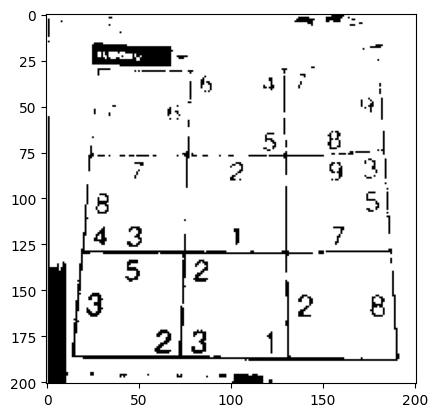

In [83]:
paper = cv2.cvtColor(cv2.imread('./img/gazeta.jpg'), cv2.COLOR_BGR2YCrCb)

def binarize_bersen(img, size):
    new_w = int(img[:,:,0].shape[0] + (size - 1))
    new_h = int(img[:,:,0].shape[1] + (size - 1))
    res = np.empty(shape=(new_w, new_h))
    res.fill(-1)
    res[size//2:new_w - size//2, size//2:new_h - size//2] = img.copy()[:,:,0]
    res_new = res.copy()
    
    for x in range(size//2, new_w - size//2):
        for y in range(size//2, new_h - size//2):
            value = res[x,y]
            max_val = value
            min_val = value
            for xx in range(x - (size - 1) // 2, x + (size - 1) // 2):    
                for yy in range(y - (size - 1) // 2, y + (size - 1) // 2):
                    if res[xx][yy] > max_val:
                        max_val = res[xx][yy]
                    if res[xx][yy] < min_val and res[xx][yy] != -1:
                        min_val = res[xx][yy]
            threshold = (max_val - min_val) // 2          
            res_new[x,y] = 0 if value < threshold else 255
        
    return res_new[size//2:new_w - size//2, size//2:new_h - size//2]

plt.imshow(binarize_bersen(paper, 21), cmap='gray')

# Zadanie 5 (3 punkty)
Progowanie mieszane przebiega podobnie, jak progowanie lokalne (metoda Bernsena), z tym, że jeśli średnia lub mediana lokalna dla danego piksela odbiega o więcej niż ustalony próg (program pobiera tą wartość jako parametr) od wartości globalnej (wyznaczona za pomocą Otsu), piksel progowany jest wartością globalną.

  * Prosze użyć algorytm progowania mieszanego do zdjęcia "gazeta.jpg".
  * Proszę wykonać na Luminancji (składowa Y z formatu YCbCr).

  Algorytm progowania mieszanego:
  1. Wyznaczamy wartość progu globalnego przy pomocy binaryzacji Otsu. Oznaczmy ten próg jako $P$.
  2. Podobnie, jak w algorytmie Brensena, przekształcamy oryginalny obrazek do skali szarości.
  3.  Wokół każdego piksela bierzemy kwadrat o nieparzystej długości $a>0$ i wyliczamy wartość minimalną oraz maksymalną z intensywności pikseli w każdym takim kwadracie. Formalnie, dla każdego punktu $\left(x,y\right)\in\mathbf{N}^2$ i ustalonego $a>0$ wyliczamy:

\begin{align}
  v_{min}\left(x,y;a\right) &= \min{ \left( I\left(i,j\right): x-a \leq i \leq x+a, \quad y-a \leq j \leq y+a \right) } \\
  v_{max}\left(x,y;a\right) &= \max{ \left( I\left(i,j\right): x-a \leq i \leq x+a, \quad y-a \leq j \leq y+a \right) }
\end{align}

4. Dla każdego kwadratu wyliczamy próg $T$ jako $T = \frac{v_{min}\left(x,y;a\right) + v_{max}\left(x,y;a\right)}{2}$. Jeżeli jednak wartość tak wyliczonego progu $T$ różni się o więcej niż $\alpha > 0$ (parametr ten powinien być wczytywany jako argument funkcji) od progu globalnego $P$, to wtedy piksel progowany jest wartością globalną. Formalnie, jeśli $\left| T - \alpha \right| > P$, to wtedy jako próg lokalny przyjmujemy próg globalny $P$.

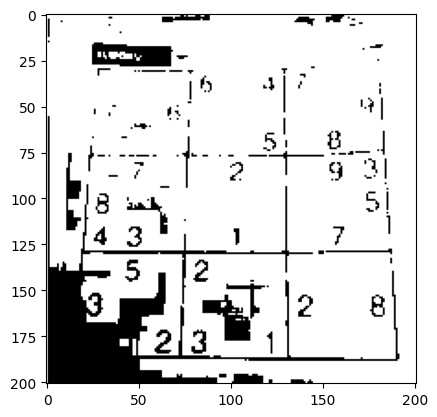

In [97]:
paper = cv2.cvtColor(cv2.imread('./img/gazeta.jpg'), cv2.COLOR_BGR2YCrCb)

def binarize_mixed(img, size, max_diff):
    new_w = int(img[:,:,0].shape[0] + (size - 1))
    new_h = int(img[:,:,0].shape[1] + (size - 1))
    res = np.empty(shape=(new_w, new_h))
    res.fill(-1)
    res[size//2:new_w - size//2, size//2:new_h - size//2] = img.copy()[:,:,0]
    res_new = res.copy()
    otsu_threshold, _ = cv2.threshold(img[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    for x in range(size//2, new_w - size//2):
        for y in range(size//2, new_h - size//2):
            value = res[x,y]
            max_val = value
            min_val = value
            for xx in range(x - (size - 1) // 2, x + (size - 1) // 2):    
                for yy in range(y - (size - 1) // 2, y + (size - 1) // 2):
                    if res[xx][yy] > max_val:
                        max_val = res[xx][yy]
                    if res[xx][yy] < min_val and res[xx][yy] != -1:
                        min_val = res[xx][yy]
            threshold = (max_val - min_val) // 2
            
            if abs(threshold - otsu_threshold) > max_diff:
                threshold = otsu_threshold
            
            res_new[x,y] = 0 if value < threshold else 255
        
    return res_new[size//2:new_w - size//2, size//2:new_h - size//2]

plt.imshow(binarize_mixed(paper, 21, 70), cmap='gray')